<a href="https://colab.research.google.com/github/ElizabethSeth/Simplon_tasks/blob/Spark_brief_colab/Another_Copy_of_Projet_Analyse_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projet Spark : Analyse de données d'un service de streaming musical


#### Context du projet  :
On considère un dataset d'un service de streaming musical à explorer.

L'objectif est de tirer des informations utiles sur l'utilisation de la plateforme, le comportement des utilisateurs et les tendances d'écoute, en utilisant les concepts fondamentaux de Spark, pour manipuler et analyser des données à grande échelle.

#### Dataset :
Le dataset utilisé, "spotify_logs.json", contient des logs / journaux d'événements d'une application de streaming musical. Chaque entrée du dataset correspond à une interaction de l'utilisateur avec le service de streaming. Les attributs incluent des informations sur l'utilisateur, telles que son ID, son genre, le niveau d'abonnement, ainsi que des détails sur les événements comme la chanson écoutée, la page visitée, l'heure de l'événement, etc.

#### Objectif du Projet :
Le projet consiste à réaliser une série d'analyses et de calculs sur ces données en utilisant Apache Spark


Ressource utile:
https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/index.html

## Travail demandé et Livrables :

- Ecrire le code Pyspark qui permet de répondre aux questions ci dessous.
- Rendre votre notebook avec la trace d'exécution de vos cellules.



### **Apache Spark is a data processing platform that allows for high-speed computation and analysis of large datasets in a distributed environment. Spark is designed to handle big data, offering high performance through the use of distributed memory and optimized algorithms.**

In [36]:
pip install pyspark

In [37]:
#Import des libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, count, when,countDistinct, col, desc, udf, col, sort_array, asc, avg
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.window import Window
from pyspark.sql.types import IntegerType, StringType


import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##  **Charger les données**

- Importer toutes autres libraries dont vous pourriez avoir besoin
- Instancier une session Spark
- Lire le dataset "spotify_logs.json"
- afficher le schéma des données


In [38]:
#votre code ici
sc = SparkSession \
    .builder \
    .appName("Spotify")\
    .getOrCreate()
sc


In [4]:
df = sc.read.json('spotify_logs.json')
df.show()


+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [5]:
top_songs = df.groupBy('artist').count().orderBy('count', ascending=False)
top_songs.show()

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|                NULL| 1653|
|            Coldplay|   83|
|       Kings Of Leon|   69|
|Florence + The Ma...|   52|
|            BjÃÂ¶rk|   46|
|       Dwight Yoakam|   45|
|       Justin Bieber|   43|
|      The Black Keys|   40|
|         OneRepublic|   37|
|        Jack Johnson|   36|
|                Muse|   36|
|           Radiohead|   31|
|        Taylor Swift|   29|
|          Lily Allen|   28|
|Barry Tuckwell/Ac...|   28|
|               Train|   28|
|           Daft Punk|   27|
|          Nickelback|   27|
|           Metallica|   27|
|          Kanye West|   26|
+--------------------+-----+
only showing top 20 rows



In [6]:

avg_songs_per_user = df.groupBy("userId").agg(count("song").alias("num_songs"))
avg_songs = avg_songs_per_user.agg({"num_songs": "avg"}).withColumnRenamed("avg(num_songs)", "avg_songs_per_user")
avg_songs.show()

+------------------+
|avg_songs_per_user|
+------------------+
| 8.658713692946058|
+------------------+



## **Questions: Exploration et Analyse de données**
2. Combien de logs sont présents dans le dataset ?
3. Combien d'artistes sont présents dans le dataset?
4. Trouver le nombre d'utilisateurs inscrits dans le dataset ?
5. Quels sont les types de niveau d'abonnement (level) disponibles dans le dataset ?
6. Quelles sont les pages disponibles dans le dataset et combien de fois chacune d'elles a-t-elle été visitée ?

7. Combien de logs a enregistré l'utilisateur d'id: 1138,

   Afficher les 5 premiers et les 5 derniers logs de cet utilisateur, que remarquez vous?
8. Combien de pages l'utilisateur avec l'id "" (empty string) n'a-t-il PAS visitée, afficher les .
9. De quel type d'utilisateurs s'agit il à votre avis?
10. Combien d'utilisateurs de chaque genre sont présents dans le dataset ?
11. Visualiser la répartition, Y a-t-il une différence significative entre le nombre d'utilisateurs de chaque genre ?
12. Quel est l'artiste le plus écouté dans le dataset et combien de fois ses chansons ont-elles été jouées ?
13. Combien de chansons différentes ont été jouées dans l'ensemble des logs ?

14. Visualiser le nombre de chansons jouées par heure,  À quelle heure de la journée les utilisateurs écoutent-ils le plus de chansons ?
15. Trouver les utilisateurs qui ont fait des upgrade et downgrade de leur abonnement?

16. Créer une vue temporaire répondre avec des requêtes SQL aux questions suivantes:

 a- Afficher les 3 premiers logs de l'utilisateur d'id 1046

 b- Trouver les pages que les utilisateurs ayant empty userID ont visité

 c- Combien de chansons ont été jouées par l'artiste le plus joué
17. Proposer un axe d'analyse de votre choix ?


In [7]:
# Combien de logs sont présents dans le dataset ?
print(f"Number of logs in the dataset: {df.count()}")

Number of logs in the dataset: 10000


In [10]:
#Combien d'artistes sont présents dans le dataset?
print(f"Number of artists in the dataset: {df.select('artist').count()}")
print(f"Number of distinct artists in the dataset: {df.select('artist').distinct().count()}")
print(f"Number of artists in the dataset: {df.select('artist').distinct().show()}")

Number of artists in the dataset: 10000
Number of distinct artists in the dataset: 3618
+--------------------+
|              artist|
+--------------------+
|      The Black Keys|
|        STRATOVARIUS|
|      The Chameleons|
|Dashboard Confess...|
|      Jarabe De Palo|
|        Ziggy Marley|
|        Yann Tiersen|
|  The Watts Prophets|
|            Goldfish|
|           Kate Nash|
|              DJ Taz|
|    Jane's Addiction|
|         Eva Cassidy|
|               Rufio|
|           Los Lobos|
|         Silverstein|
|        Rhett Miller|
|              Nebula|
|Yonder Mountain S...|
|     Groove Coverage|
+--------------------+
only showing top 20 rows

Number of artists in the dataset: None


In [ ]:
#Trouver le nombre d'utilisateurs inscrits dans le dataset ?
print(f"Number of users in the this dataset: {df.select('userId').distinct().count()}")

Number of users in the this dataset: 964


In [11]:
#Quels sont les types de niveau d'abonnement (level) disponibles dans le dataset ?
print(f"Levels available in this dataset: {df.select('level').distinct().count()}")
df.groupby("level").count().show()

Levels available in this dataset: 2
+-----+-----+
|level|count|
+-----+-----+
| free| 3076|
| paid| 6924|
+-----+-----+



In [15]:
# Quelles sont les pages disponibles dans le dataset et combien de fois chacune d'elles a-t-elle été visitée ?
print(f"Pages available in this dataset: {df.select('page').distinct().count()}")
df.groupBy('page').count().orderBy('count', ascending=False).show()


Pages available in this dataset: 13
+----------------+-----+
|            page|count|
+----------------+-----+
|        NextSong| 8347|
|            Home| 1126|
|           Login|  126|
|          Logout|  100|
|       Downgrade|   75|
|        Settings|   59|
|            Help|   58|
|           About|   43|
|         Upgrade|   32|
|           Error|   12|
|   Save Settings|   11|
|  Submit Upgrade|   10|
|Submit Downgrade|    1|
+----------------+-----+



In [ ]:
#Combien de logs a enregistré l'utilisateur d'id: 1138
print(f"Number of logs for userId that have id== 1138: {df.filter(df.userId== 1138).count()}")
df.filter(df.userId== 1138).sort('ts').show(5)
df.filter(df.userId== 1138).sort('ts', ascending=False).show(5)


Number of logs for userId that have id== 1138: 68
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|         NULL|Logged In|    Kelly|     F|            2|  Newton|     NULL| paid|Houston-The Woodl...|   GET|    Home|1513283366284|     5566|                NULL|   200|1513729066284|Mozilla/5.0 (Wind...|  1138|
|    Black Box|Logged In|    Kelly|     F|            3|  Newton|247.03955| paid|Houston-The Woodl

In [16]:
#Combien de pages l'utilisateur avec l'id "" (empty string) n'a-t-il PAS visitée, afficher les .

print(f"Number of users pages with '' : {df.filter(df.userId == '').select('page').distinct().count()}")
print(f"Number of users pages with '' : {df.filter(df.userId == '').select('page').distinct().show()}")


all_pages = df.select("page").distinct()

# Get pages visited by the empty userId
empty_user_pages = df.filter(col("userId") == "").select("page").distinct()

# Find pages that the empty userId has not visited
pages_not_visited = all_pages.subtract(empty_user_pages)

# Show the pages that the empty userId has not visited
pages_not_visited.show()

Number of users pages with '' : 4
+-----+
| page|
+-----+
| Home|
|About|
|Login|
| Help|
+-----+

Number of users pages with '' : None
+----------------+
|            page|
+----------------+
|Submit Downgrade|
|       Downgrade|
|          Logout|
|   Save Settings|
|        Settings|
|        NextSong|
|         Upgrade|
|           Error|
|  Submit Upgrade|
+----------------+



In [ ]:
#De quel type d'utilisateurs s'agit il à votre avis?
print(f"Type of users : {df.select('gender').distinct().count()}")
print(f"there three type of users : {df.select('gender').distinct().show()}")


Type of users : 3
+------+
|gender|
+------+
|     F|
|     M|
|  NULL|
+------+

there three type of users : None


In [18]:
# Combien d'utilisateurs de chaque genre sont présents dans le dataset ?
gender_count = df.select("userId", "gender").distinct().groupBy("gender").count()
print(f"NUmber of users per gender : {gender_count.show()}")

+------+-----+
|gender|count|
+------+-----+
|     F|  462|
|  NULL|    1|
|     M|  501|
+------+-----+

NUmber of users per gender : None


<ipython-input-22-27b266a85bdc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='count', data=gender_count_pd, palette='pastel')


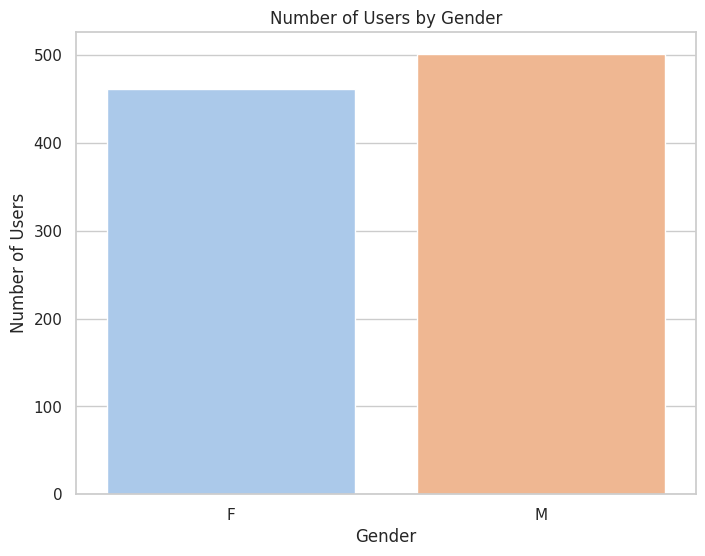

In [22]:
gender_count_pd = gender_count.toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='count', data=gender_count_pd, palette='pastel')
plt.title('Number of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()


In [26]:
# Quel est l'artiste le plus écouté dans le dataset et combien de fois ses chansons ont-elles été jouées ?
filtered_df = df.filter(df.artist.isNotNull())
top_songs = filtered_df.groupBy('artist').count().orderBy('count', ascending=False)
top_songs.show(5)

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|            Coldplay|   83|
|       Kings Of Leon|   69|
|Florence + The Ma...|   52|
|            BjÃÂ¶rk|   46|
|       Dwight Yoakam|   45|
+--------------------+-----+
only showing top 5 rows



In [29]:
# Combien de chansons différentes ont été jouées dans l'ensemble des logs ?
unique_songs_count = df.select(countDistinct("song")).collect()[0][0]
print(f"Number of unique songs played: {unique_songs_count}")
unique_songs_count = df.select(countDistinct("song")).show()

Number of unique songs played: 6125
+--------------------+
|count(DISTINCT song)|
+--------------------+
|                6125|
+--------------------+



In [30]:
# Trouver les utilisateurs qui ont fait des upgrade et downgrade de leur abonnement?
print(f" Users that upgrade and downgrade their abon : {df.filter((df.page == 'Submit Upgrade') | (df.page == 'Submit Downgrade')).count()}")
print(f" Users that upgrade and downgrade their abon : {df.filter((df.page == 'Submit Upgrade') | (df.page == 'Submit Downgrade')).show()}")

 Users that upgrade and downgrade their abon : 11
+------+---------+---------+------+-------------+---------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+
|artist|     auth|firstName|gender|itemInSession| lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|
+------+---------+---------+------+-------------+---------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+
|  NULL|Logged In|   Ashton|     M|            4|   Nelson|  NULL| free|Los Angeles-Long ...|   PUT|  Submit Upgrade|1510608931284|      511|NULL|   307|1513730197284|Mozilla/5.0 (Wind...|   512|
|  NULL|Logged In|   Dreden|     M|            3|Rodriguez|  NULL| free|New York-Newark-J...|   PUT|  Submit Upgrade|1513620661284|     5846|NULL|   307|1513739104284

+----+-----+
|hour|count|
+----+-----+
|   0|  548|
|   1|  538|
|   2|  444|
|   3|  367|
|   4|  426|
|   5|  346|
|   6|  432|
|   7|  424|
|   8|  467|
|   9|  294|
|  10|  256|
|  11|  268|
|  12|  297|
|  13|  428|
|  14|  587|
|  15|  579|
|  16|  577|
|  17|  499|
|  18|  421|
|  19|  350|
+----+-----+
only showing top 20 rows



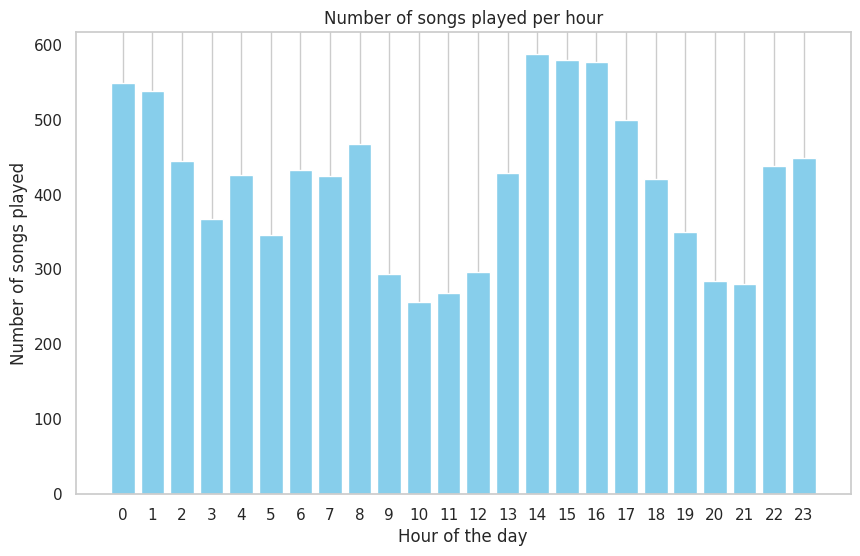

In [32]:
from pyspark.sql.functions import hour, from_unixtime
#Convert the 'ts' column from BIGINT to TIMESTAMP by dividing by 1000 and using from_unixtime
df = df.withColumn("timestamp", (col("ts") / 1000).cast("timestamp"))
songs_per_hour = df.withColumn("hour", hour(col("timestamp"))) \
                   .groupBy("hour") \
                   .count() \
                   .orderBy("hour")

songs_per_hour.show()

pandas_df = songs_per_hour.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(pandas_df['hour'], pandas_df['count'], color='skyblue')
plt.xticks(range(24))
plt.xlabel('Hour of the day')
plt.ylabel('Number of songs played')
plt.title('Number of songs played per hour')
plt.grid(axis='y')
plt.show()

In [41]:
# Créer une vue temporaire répondre avec des requêtes SQL aux questions suivantes:
# a- Afficher les 3 premiers logs de l'utilisateur d'id
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Logs").getOrCreate()
df = spark.read.json("spotify_logs.json")
df.createOrReplaceTempView("logs")
spark.sql("select * from logs where userId == 1046").show(3)


+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|Darius Rucker|Logged In|  Kenneth|     M|          113|Matthews|206.00118| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|  Be W

In [42]:
#b- Trouver les pages que les utilisateurs ayant empty userID ont visité
spark.sql("select page from logs where userId == ''").show()

+-----+
| page|
+-----+
|Login|
| Home|
| Home|
| Home|
|Login|
|Login|
| Home|
| Home|
|Login|
| Home|
|Login|
| Home|
| Help|
| Home|
|Login|
| Home|
|Login|
| Home|
|Login|
| Home|
+-----+
only showing top 20 rows



In [43]:
# c- Combien de chansons ont été jouées par l'artiste le plus joué
spark.sql("select artist, count(song) as nb_song from logs group by artist order by nb_song desc").show(1)

+--------+-------+
|  artist|nb_song|
+--------+-------+
|Coldplay|     83|
+--------+-------+
only showing top 1 row



## Bar chart showing average songs played per session by account level.

<ipython-input-44-15d62252dcf6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_songs_pd, x='level', y='avg_songs_played', palette='viridis')


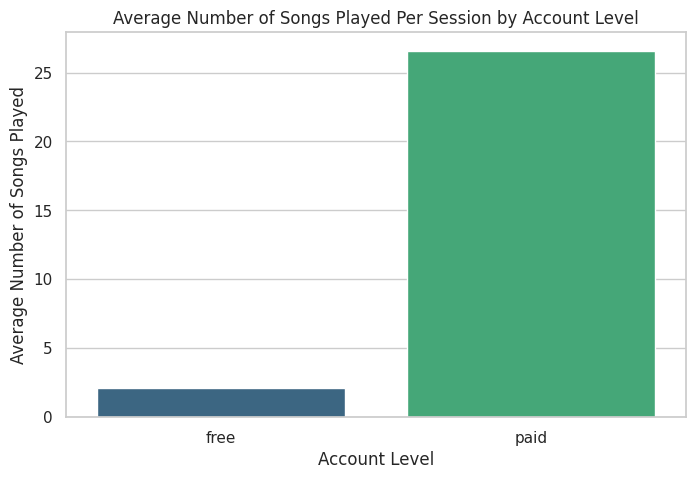

In [44]:
df = df.withColumn('ts', from_unixtime(df['ts'] / 1000))

session_engagement = df.filter(df['page'] == 'NextSong') \
                      .groupBy(['userId', 'sessionId', 'level']) \
                      .count() \
                      .withColumnRenamed('count', 'songs_played')
avg_songs_per_session = session_engagement.groupBy('level') \
                                          .agg(avg('songs_played').alias('avg_songs_played'))

avg_songs_pd = avg_songs_per_session.toPandas()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_songs_pd, x='level', y='avg_songs_played', palette='viridis')
plt.title('Average Number of Songs Played Per Session by Account Level')
plt.xlabel('Account Level')
plt.ylabel('Average Number of Songs Played')
plt.show()

## 1. Analysis:

Group and count page visits by account level.
## 2. Visualization:

Plot bar chart showing visit distribution by page type and account level.

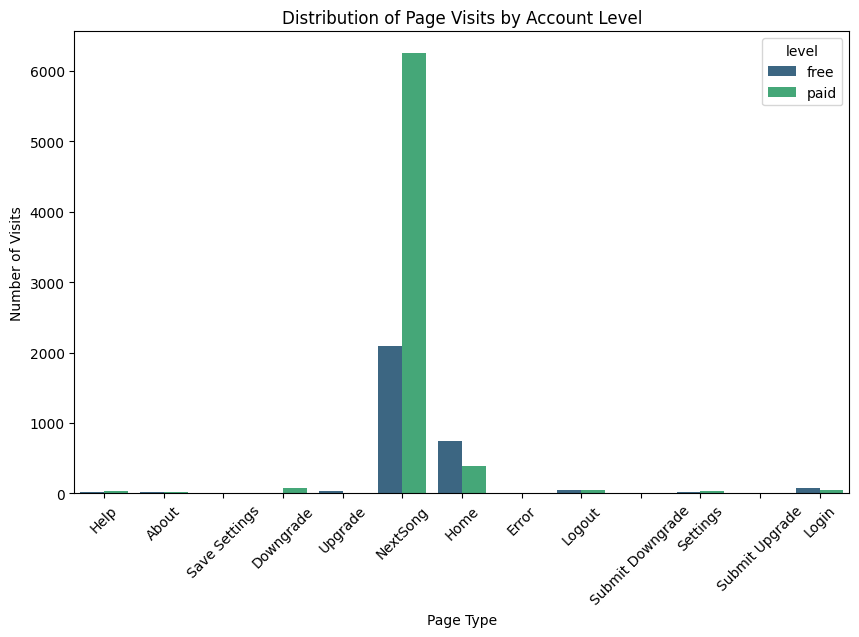

In [ ]:
# Analyzing page visits by account level
page_visits = df.groupBy(['level', 'page']).count()

page_visits_pd = page_visits.toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=page_visits_pd, x='page', y='count', hue='level', palette='viridis')
plt.title('Distribution of Page Visits by Account Level')
plt.xlabel('Page Type')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()
